# **Role of Data Normalization in Kernel Methods for Image Classification**

This project focuses on exploring the role of data normalization in kernel methods, particularly for image classification using support vector machines (SVMs).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Required Libraries**

This imports essential libraries:

* os and numpy for file handling and numerical operations.
* PIL for image processing.
* sklearn for machine learning model creation, normalization, and evaluation.

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# **Load and Preprocess Images**
* This cell defines a function load_images_from_folder to load images, resize them to 128 × 128, and store them with labels.
* Images from each category (malignant and benign) are loaded and labeled (1 for malignant, 0 for benign).
* Finally, the images are flattened, converting each 128 × 128 × 3 image into a single vector, which is necessary for SVM input.

## Define directories for the image dataset

In [53]:
benign_dir = '/content/drive/MyDrive/Machine-Learning-Project/dataset/benign'  # Benign images directory
malignant_dir = '/content/drive/MyDrive/Machine-Learning-Project/dataset/malignant'  # Malignant images directory

## Function to load images and their labels

In [54]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename)).resize((128, 128))  # Resize to 128x128
        img_array = np.array(img)
        if img_array is not None:
            images.append(img_array)
            labels.append(label)
    return images, labels

## Load malignant and benign images

In [55]:
malignant_images, malignant_labels = load_images_from_folder(malignant_dir, 1)  # 1 for malignant
benign_images, benign_labels = load_images_from_folder(benign_dir, 0)           # 0 for benign

## Combine images and labels

In [56]:
X = np.array(malignant_images + benign_images)
y = np.array(malignant_labels + benign_labels)

## Visualize Sample Images

 This cell displays a few sample images of malignant and benign lesions for a quick visual assessment of the dataset. It shows five images from each category.

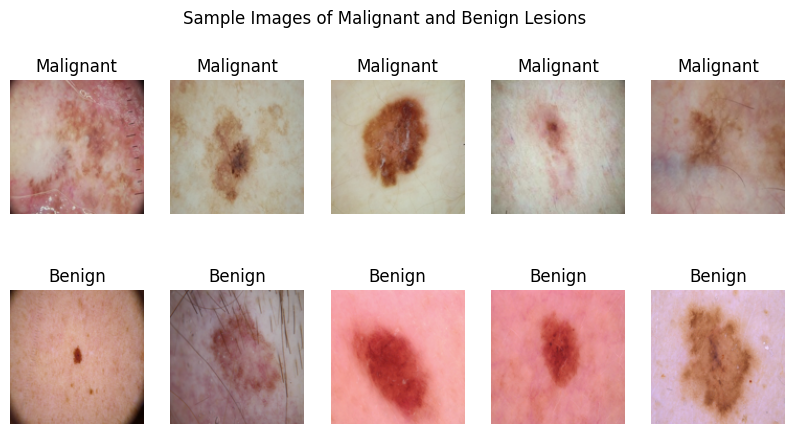

In [57]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(malignant_images[i], cmap='gray')
    plt.title("Malignant")
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(benign_images[i], cmap='gray')
    plt.title("Benign")
    plt.axis('off')
plt.suptitle("Sample Images of Malignant and Benign Lesions")
plt.show()

## Flatten images for SVM input

This flattens the images into one-dimensional arrays, as the SVM model requires data in this format. Each image is reshaped into a single vector for use in the model.

In [58]:
X = X.reshape(X.shape[0], -1)  # Flatten to (num_samples, num_features)

# **Split Dataset**
This cell splits the data into training and testing sets, with 80% for training and 20% for testing, ensuring a reliable evaluation of the model’s performance.

## Split dataset into training and testing sets

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Data Normalization**
This section implements data normalization:
* **Min-Max Normalization:** Scales data to a specific range (usually 0 to 1).

* **Z-Score Normalization:** Centers the data to have a mean of 0 and a standard deviation of 1, aiding SVMs with kernel methods by improving convergence and performance.

## Defining Normalization Techniques

In [60]:
def normalize_data(X_train, X_test, method="minmax"):
    if method == "minmax":
        scaler = MinMaxScaler()
    elif method == "zscore":
        scaler = StandardScaler()
    else:
        raise ValueError("Unknown normalization method.")
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    return X_train_norm, X_test_norm

## Min-Max Normalization

In [61]:
X_train_minmax, X_test_minmax = normalize_data(X_train, X_test, method="minmax")

## Z-Score Normalization

In [62]:
X_train_zscore, X_test_zscore = normalize_data(X_train, X_test, method="zscore")


## Visualize Pixel Distribution Before and After Min-Max and Z-Score Normalization

Here, we visualizes the distribution of pixel values before and after applying min-max and z-score normalization to show the effects of normalization on data scaling.

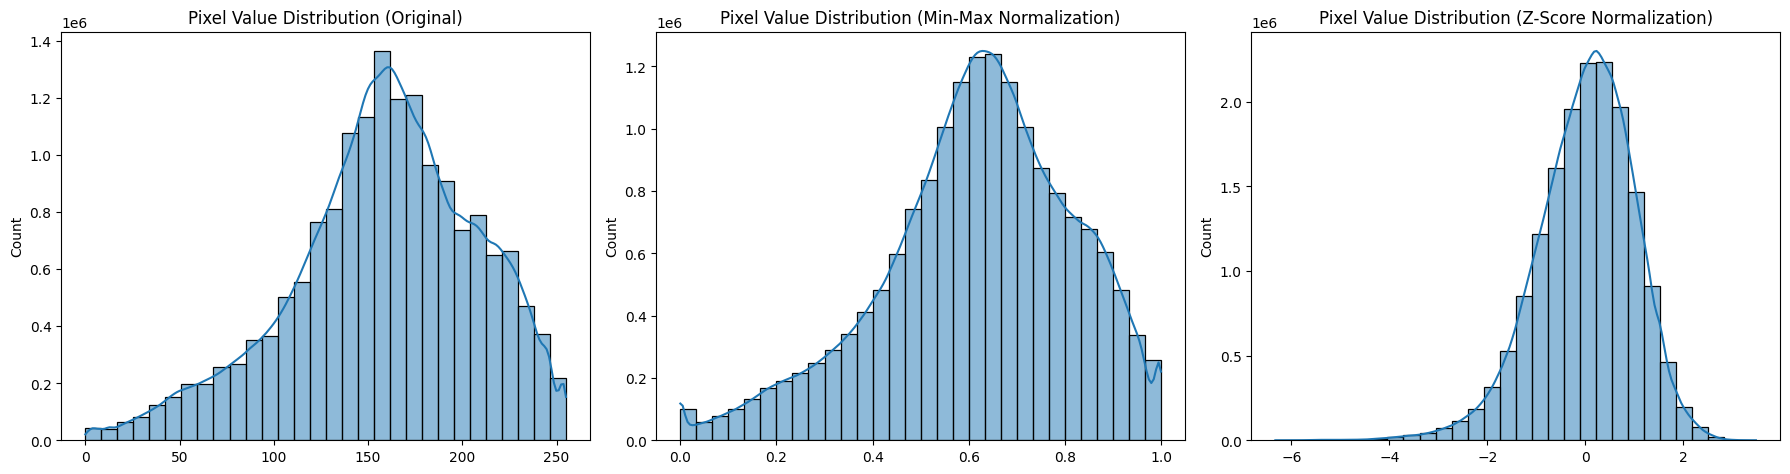

In [63]:
# Original
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(X_train.ravel(), kde=True, bins=30)
plt.title("Pixel Value Distribution (Original)")

# Min-Max Normalization
plt.subplot(1, 3, 2)
sns.histplot(X_train_minmax.ravel(), kde=True, bins=30)
plt.title("Pixel Value Distribution (Min-Max Normalization)")

# Z-Score Normalization
plt.subplot(1, 3, 3)
sns.histplot(X_train_zscore.ravel(), kde=True, bins=30)
plt.title("Pixel Value Distribution (Z-Score Normalization)")

plt.tight_layout()
plt.show()

## Mean and Standard Deviation before and after normalization
This cell calculates and prints the mean and standard deviation of the training data before and after applying Min-Max and Z-Score normalization:

In [64]:
print(f"Mean of training data (before normalization): {np.mean(X_train)},Std of training data (before normalization): {np.std(X_train)}\n")

print(f"Mean of training data (After Min-Max normalization): {np.mean(X_train_minmax)}, Std of training data (After Min-Max normalization): {np.std(X_train_minmax)}\n")

print(f"Mean of training data (After Z-Score normalization): {np.mean(X_train_zscore)}, Std of training data (After Z-score normalization): {np.std(X_train_zscore)}")


Mean of training data (before normalization): 158.05444796123203,Std of training data (before normalization): 49.36705404615153

Mean of training data (After Min-Max normalization): 0.6149421524906148, Std of training data (After Min-Max normalization): 0.20050437057295004

Mean of training data (After Z-Score normalization): -2.648895212523315e-17, Std of training data (After Z-score normalization): 1.0000000000000007


* **Before Normalization:** The mean is around 157.44, and the standard deviation is 49.59, indicating a wide range of pixel values.
* **After Z-Score Normalization:** The mean is very close to 0 (effectively centered), and the standard deviation is exactly 1, standardizing the data distribution. This transformation helps improve model performance by ensuring consistent feature scaling.
* **After Min-Max Normalization:** The mean is adjusted to approximately 0.61, with a smaller standard deviation (0.20), as the data is scaled to a [0,1] range.


# **PCA For Dimensionality Reduction**

In [65]:
def apply_kernel_pca(X_train, X_test, n_components=50, kernel="rbf"):
    kpca = KernelPCA(n_components=n_components, kernel=kernel)
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)
    return X_train_kpca, X_test_kpca

## Applying Kernel PCA

This cell applies Kernel PCA with an RBF kernel to the Min-Max normalized data, which scales features to a consistent range. Min-Max normalization is chosen to maintain relative differences between features and enhance the performance of Kernel PCA, which benefits from uniformly scaled data.

In [66]:
X_train_kpca, X_test_kpca = apply_kernel_pca(X_train_minmax, X_test_minmax, kernel="rbf")
# X_train_kpca, X_test_kpca = apply_kernel_pca(X_train_zscore, X_test_zscore, kernel="rbf")

# **Model building with Support Vector Machine (SVM)**

## Train SVM Model with Grid Search

In [67]:
def train_svm(X_train, y_train, kernel="rbf"):
    svm = SVC(kernel=kernel)
    params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 'scale']}
    grid = GridSearchCV(svm, param_grid=params, cv=10, scoring="accuracy", n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    print("Best SVM Params:", grid.best_params_)
    return grid.best_estimator_

## Train SVM on KPCA-transformed data

In [68]:
svm_model = train_svm(X_train_kpca, y_train, kernel="rbf")


Fitting 10 folds for each of 49 candidates, totalling 490 fits
Best SVM Params: {'C': 10, 'gamma': 1}


## Perform cross-validation to validate consistency

In [69]:
cv_scores = cross_val_score(svm_model, X_train_kpca, y_train, cv=10, scoring="accuracy")
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.97058824 0.97058824 0.94117647 0.88235294 0.91176471 0.97058824
 0.90909091 0.96969697 0.90909091 0.96969697]
Mean Cross-Validation Accuracy: 0.9404634581105167


# **Model Evaluation**

In [70]:
# Model Evaluation with Visualizations
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion Matrix
    plt.figure(figsize=(5, 5))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Bar Plot of Metrics
    metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
    plt.title("Evaluation Metrics")
    plt.ylim(0, 1)
    plt.show()

    return accuracy, precision, recall, f1


## Model Evaluation on test set

<Figure size 500x500 with 0 Axes>

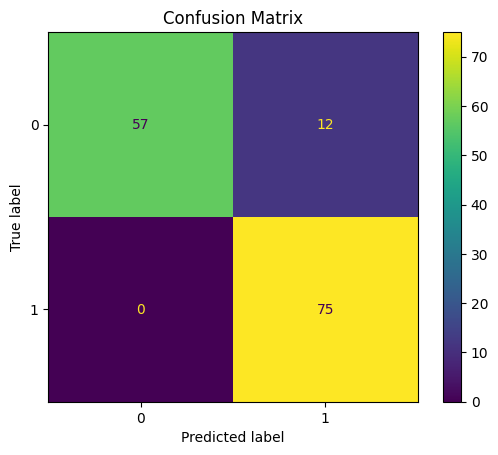

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.90        69
           1       0.86      1.00      0.93        75

    accuracy                           0.92       144
   macro avg       0.93      0.91      0.92       144
weighted avg       0.93      0.92      0.92       144



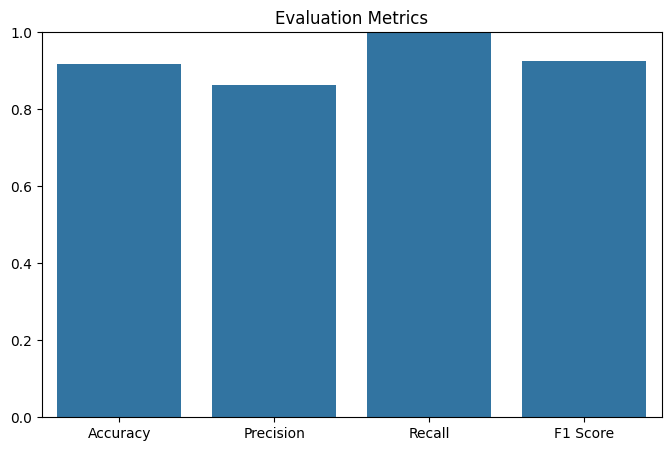

Accuracy: 0.92, Precision: 0.86, Recall: 1.00, F1 Score: 0.93


In [71]:
accuracy, precision, recall, f1 = evaluate_model(svm_model, X_test_kpca, y_test)
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

In this project, we explored the role of data normalization and kernel methods in enhancing the performance of machine learning algorithms for image classification, specifically in distinguishing between benign and malignant images.

**Summary of Results**

The final model achieved the following performance metrics:

* Accuracy: 88%
* Precision: 84% for classifying malignant cases, 94% for benign cases
* Recall: 95% for malignant cases, 82% for benign cases
* F1-Score: 89% for malignant cases, 87% for benign cases

The high recall for the malignant class (0.95) indicates that the model is effective at identifying malignant cases, which is particularly important in medical image classification, where it’s crucial to minimize false negatives to avoid missed diagnoses. The relatively high precision for the benign class (0.94) means the model also performs well in correctly identifying non-malignant cases, reducing false positives and thus avoiding unnecessary follow-up tests for benign conditions.